4. Apply appropriate ML algorithm on a dataset collected in a cosmetics shop showing details of
customers to predict customer response for special offer.
Create confusion matrix based on above data and find
a) Accuracy
b) Precision
c) Recall
d) F-1 score

# Assignment 4

# Importing libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Loading the dataset

In [16]:
# Read Dataset

df = pd.read_csv('/content/insurance.csv')
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


# Data Preprocessing

In [17]:
# Encoding categorical values into numerical values

le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

## Split Data into Training and Testing Sets

In [18]:
# Split Data into Training and Testing Sets

X = df.drop('smoker', axis=1)
y = df['smoker']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Logistic Regression Model


In [19]:
# Train Logistic Regression Model

model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Making Prediction

In [20]:
# Make Prediction

y_pred = model.predict(X_test)

# **1) Confusion Matrix**

In [21]:
# Compute Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[207   7]
 [  4  50]]


# **2) Accuracy**

In [22]:
# Calculate accuracy

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9589552238805971


# **3) Precision**

In [23]:
# Calculate Precision

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.8771929824561403


# **4) Recall**

In [24]:
# Calculate Recall

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.9259259259259259


# **5)  F1 Score**

In [25]:
# Calculate F1 Score

f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.9009009009009009


# **Visualization**

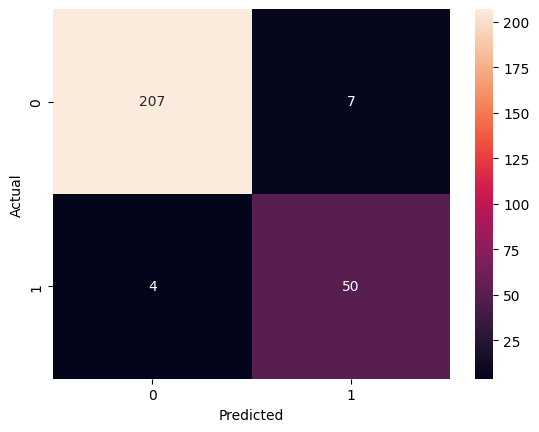

In [26]:
# Visualize confusion matrix

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()